# Dataset Description

1. Transaction_ID: Unique identifier for each transaction.
2. Timestamp: Date and time of the transaction.
3. Vehicle_Type: Type of vehicle involved in the transaction.
4. FastagID: Unique identifier for Fastag.
5. TollBoothID: Identifier for the toll booth.
6. Lane_Type: Type of lane used for the transaction.
7. Vehicle_Dimensions: Dimensions of the vehicle.
8. Transaction_Amount: Amount associated with the transaction.
9. Amount_paid: Amount paid for the transaction.
10. Geographical_Location: Location details of the transaction.
11. Vehicle_Speed: Speed of the vehicle during the transaction.
12. Vehicle_Plate_Number: License plate number of the vehicle.
13. Fraud_indicator: Binary indicator of fraudulent activity (target variable).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('FastagFraudDetection.csv')

In [3]:
df.sample(5)

Transaction_ID        Timestamp Vehicle_Type         FastagID  \
1140            1141   6/27/2023 3:05          SUV  FTG-187-LMN-890   
4741            4742  2/16/2023 16:20          Car  FTG-201-XYZ-989   
2922            2923   4/2/2023 10:23   Motorcycle              NaN   
2580            2581   5/6/2023 17:28        Truck  FTG-083-BVC-765   
4439            4440   1/30/2023 9:40         Bus   FTG-429-QFZ-543   

     TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  \
1140       B-102   Express              Large                 150   
4741       A-101   Regular              Small                  90   
2922       D-105   Regular              Small                   0   
2580       C-103   Express              Large                 350   
4439       C-103   Regular              Large                 300   

      Amount_paid                  Geographical_Location  Vehicle_Speed  \
1140           90   12.84197701525119, 77.67547528176169             64   
4741           90   13.21331620748757, 77.55413526894684             74   
2922            0  13.059816123454882, 77.77068662374292             66   
2580          350  13.059816123454882, 77.77068662374292             63   
4439          300  12.936687032945434, 77.53113977439017             87   

     Vehicle_Plate_Number Fraud_indicator  
1140           MH36GH3456           Fraud  
4741           TN78AB2345       Not Fraud  
2922           KA23NO2345       Not Fraud  
2580           KA89NB1234       Not Fraud  
4439           TS67EF1234       Not Fraud

In [4]:
df.shape

(5000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [7]:
[features for features in df.columns if df[features].isnull().sum()>0]

['FastagID']

In [8]:
df.describe(include='object')

Timestamp Vehicle_Type         FastagID TollBoothID Lane_Type  \
count            5000         5000             4451        5000      5000   
unique           4423            7             4451           6         2   
top     1/1/2023 8:15         Bus   FTG-001-ABC-121       B-102   Regular   
freq                5          716                1        1432      2858   

       Vehicle_Dimensions                  Geographical_Location  \
count                5000                                   5000   
unique                  3                                      5   
top                 Large  13.059816123454882, 77.77068662374292   
freq                 2144                                   1000   

       Vehicle_Plate_Number Fraud_indicator  
count                  5000            5000  
unique                 5000               2  
top              KA11AB1234       Not Fraud  
freq                      1            4017

In [9]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [10]:
column_values= ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Fraud_indicator']

for column in column_values:
    print(f'Unique values for {column}:')
    print(df[column].unique())
    print()


Unique values for Vehicle_Type:
['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']

Unique values for TollBoothID:
['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']

Unique values for Lane_Type:
['Express' 'Regular']

Unique values for Vehicle_Dimensions:
['Large' 'Small' 'Medium']

Unique values for Fraud_indicator:
['Fraud' 'Not Fraud']



In [11]:
df.describe()

Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000

# Exploratory Data Analysis

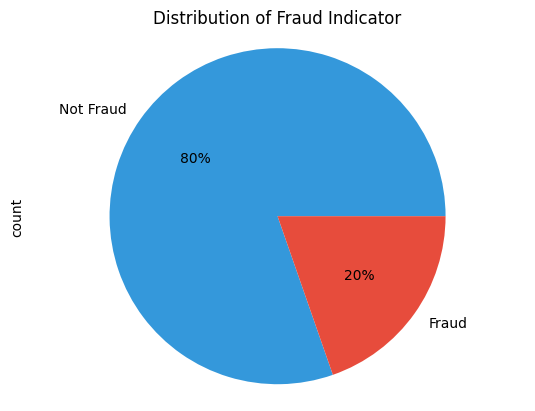

In [12]:
colors = ['#3498db', '#e74c3c']
df['Fraud_indicator'].value_counts().plot(kind='pie', autopct='%1.f%%', colors=colors)
plt.title('Distribution of Fraud Indicator')
plt.axis('equal') 
plt.show()

In [13]:
df['Fraud_indicator'].value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

Here, the output indicates that the 'Fraud_indicator' values are imbalanced, with 80% classified as Not Fraud and 20% as Fraud. This imbalance in the dataset could potentially pose challenges for model training and may need to be addressed to ensure a more balanced representation of both classes.

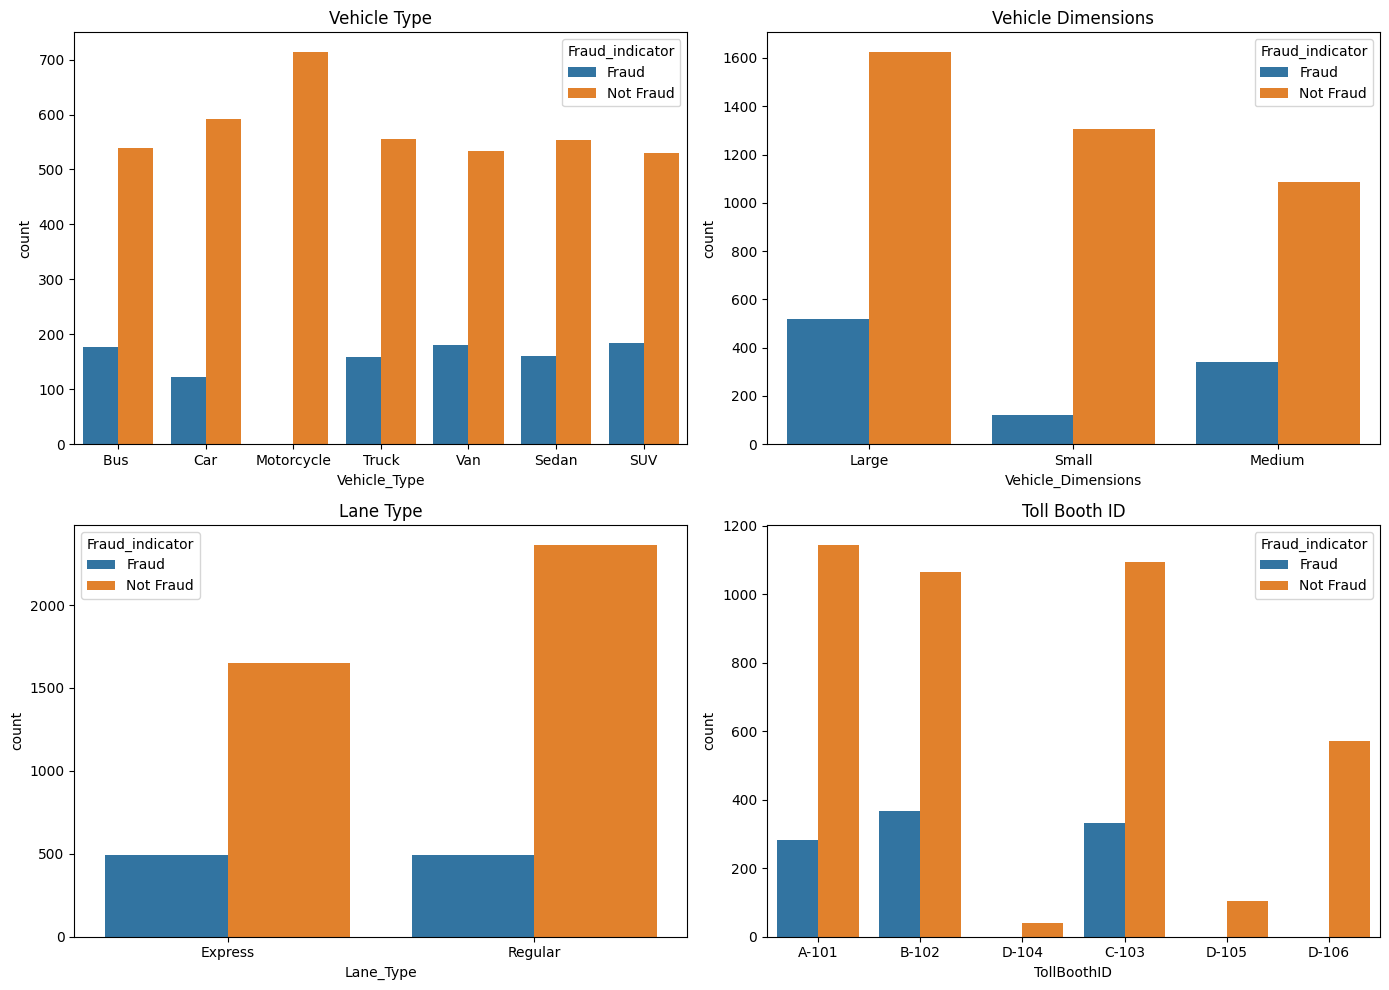

In [14]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot countplots in each subplot
sns.countplot(x='Vehicle_Type', data=df, hue='Fraud_indicator', ax=axes[0, 0])
axes[0, 0].set_title('Vehicle Type')

sns.countplot(x='Vehicle_Dimensions', data=df, hue='Fraud_indicator', ax=axes[0, 1])
axes[0, 1].set_title('Vehicle Dimensions')

sns.countplot(x='Lane_Type', data=df, hue='Fraud_indicator', ax=axes[1, 0])
axes[1, 0].set_title('Lane Type')

sns.countplot(x='TollBoothID', data=df, hue='Fraud_indicator', ax=axes[1, 1])
axes[1, 1].set_title('Toll Booth ID')

# Adjust layout for better spacing
plt.tight_layout()

# Vehicle_Type:


| Vehicle_Type | Fraud_indicator | Count |
|--------------|-----------------|-------|
| Bus          | Fraud           | 177   |
| Bus          | Not Fraud       | 539   |
| Car          | Fraud           | 122   |
| Car          | Not Fraud       | 592   |
| Motorcycle   | Not Fraud       | 714   |
| SUV          | Fraud           | 184   |
| SUV          | Not Fraud       | 530   |
| Sedan        | Fraud           | 161   |
| Sedan        | Not Fraud       | 553   |
| Truck        | Fraud           | 158   |
| Truck        | Not Fraud       | 556   |
| Van          | Fraud           | 181   |
| Van          | Not Fraud       | 533   |

# TollBoothID:

| Fraud_indicator | TollBoothID | Vehicle_Type | Fraud | Not Fraud |
|-----------------|-------------|--------------|-------|-----------|
| 1               | A-101       | Bus          | 2     | 2         |
| 2               | A-101       | Car          | 120   | 590       |
| 3               | A-101       | Sedan        | 161   | 553       |
| 4               | B-102       | Car          | 2     | 2         |
| 5               | B-102       | SUV          | 184   | 530       |
| 6               | B-102       | Van          | 181   | 533       |
| 7               | C-103       | Bus          | 175   | 537       |
| 8               | C-103       | Truck        | 158   | 556       |
| 9               | D-104       | Motorcycle   | 0     | 40        |
| 10              | D-105       | Motorcycle   | 0     | 104       |
| 11              | D-106       | Motorcycle   | 0     | 570       |

# General Insights:
    1.Motorcycles haven't been involved in any recorded fraud instances across all TollBooths.
    2.SUVs have a relatively high count of both fraud and not fraud instances.
    3.Buses, Sedans, Trucks, and Vans show a mix of fraud and not fraud instances.


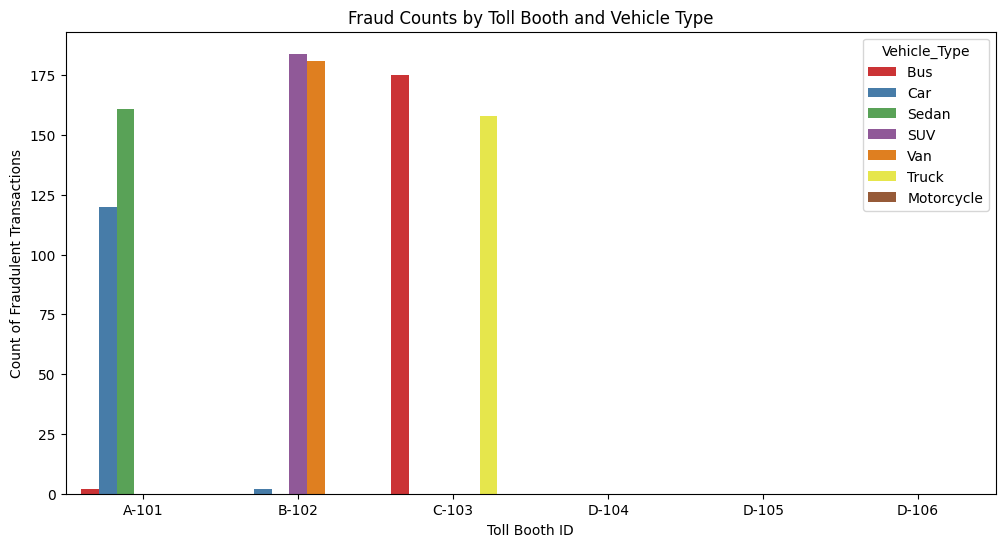

In [15]:
derived = df.groupby(['TollBoothID','Vehicle_Type','Fraud_indicator']).size().reset_index(name='Count')
derived_pivot = derived.pivot_table(index=['TollBoothID', 'Vehicle_Type'], columns='Fraud_indicator', values='Count', fill_value=0).reset_index()

# Define a custom color palette
custom_palette = sns.color_palette("Set1", n_colors=len(derived_pivot['Vehicle_Type'].unique()))

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='TollBoothID', y='Fraud', data=derived_pivot, hue='Vehicle_Type', palette=custom_palette, dodge=True)
plt.title('Fraud Counts by Toll Booth and Vehicle Type')
plt.xlabel('Toll Booth ID')
plt.ylabel('Count of Fraudulent Transactions')
plt.show()


In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Amount_paid', hue='Fraud_indicator', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Transaction Amount vs Amount Paid')
plt.xlabel('Transaction Amount')
plt.ylabel('Amount Paid')
plt.legend(title='Fraud Indicator')

Upon close examination of the data, it becomes evident that instances of fraud tend to occur when the Transaction amount is either significantly lower or higher to  Amount paid. Conversely, when the Transaction amount is equal to Amount paid, it generally corresponds to non-fraudulent transactions.

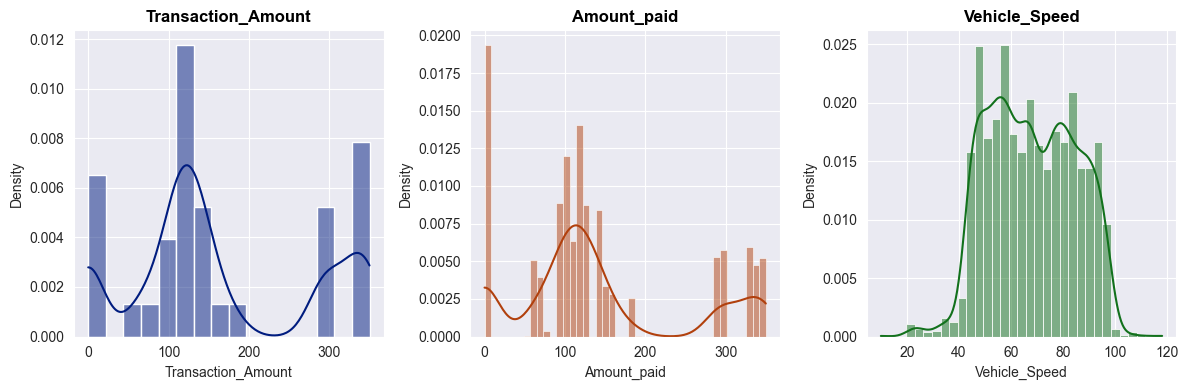

In [17]:
numerical_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

sns.set_style('darkgrid')
colors = sns.color_palette(palette='dark', n_colors=len(numerical_columns))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], color=colors[i], kde=True, fill=True, stat='density', ax=axs[i])
    axs[i].set_title(col, color='black', fontweight='bold')

fig.tight_layout()

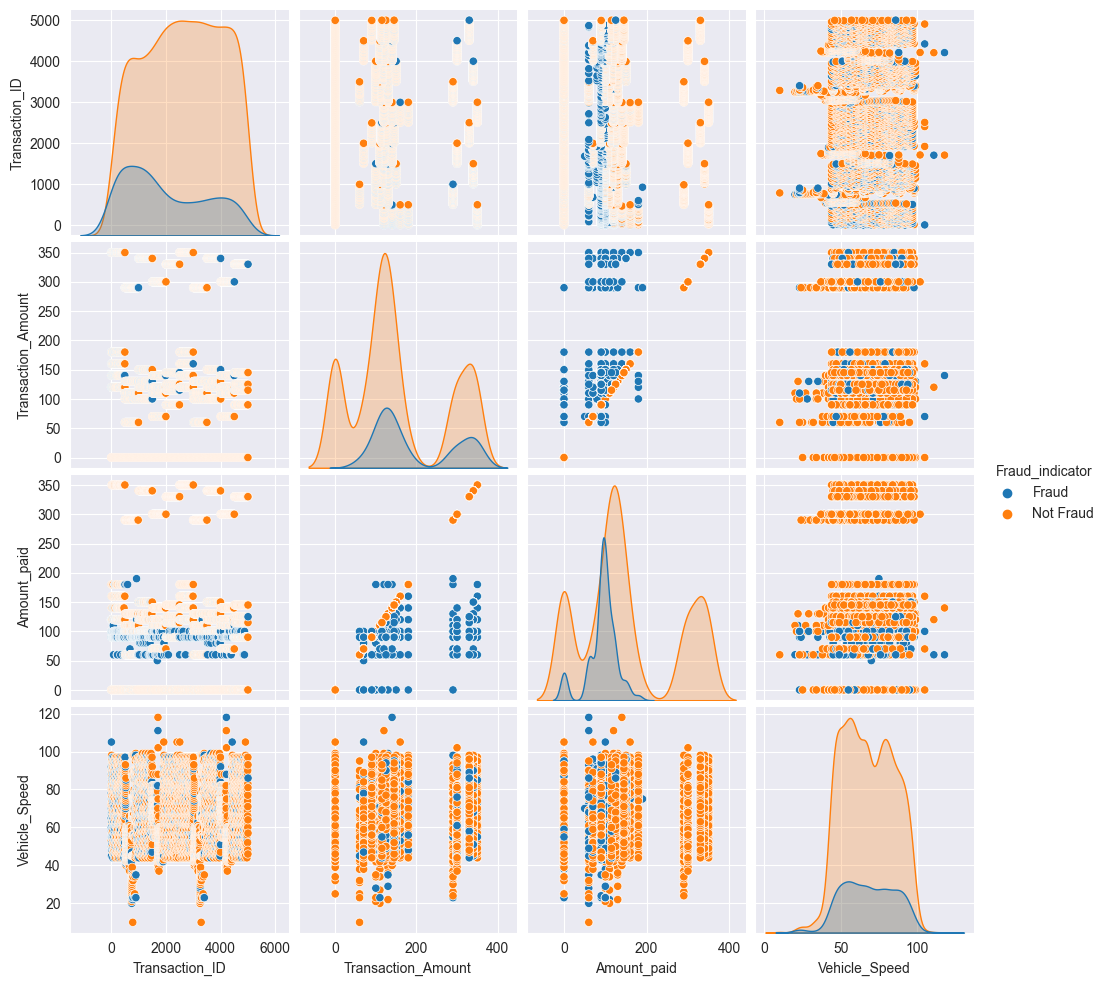

In [18]:
sns.pairplot(df,hue='Fraud_indicator')

# Feature Extraction

In [19]:
df['State_Code'] = df['Vehicle_Plate_Number'].str[:2]

In [20]:
#dropping column Vehicle_Plate_Number
df=df.drop('Vehicle_Plate_Number', axis=1)

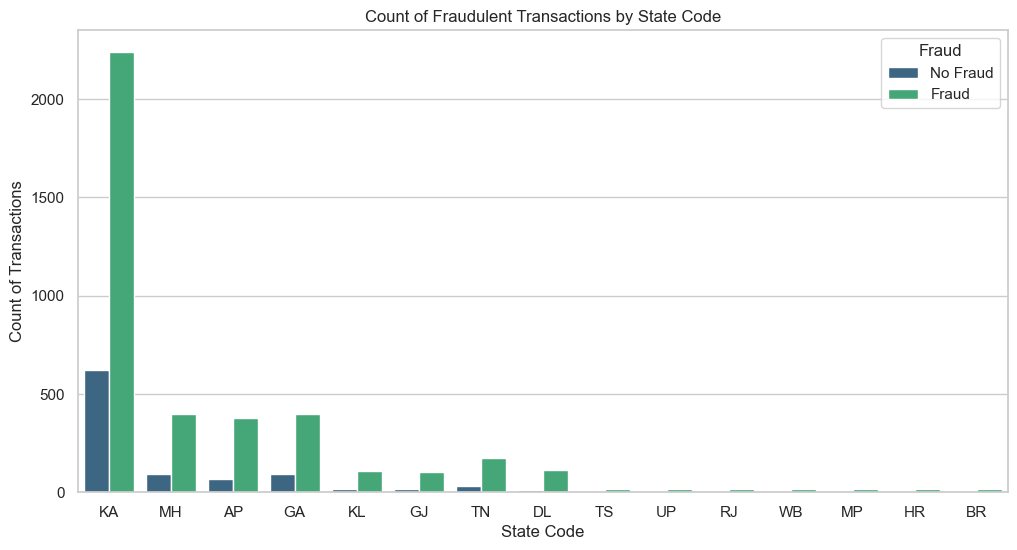

In [21]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(x='State_Code', data=df, hue='Fraud_indicator', palette='viridis')

# Add title and labels
plt.title('Count of Fraudulent Transactions by State Code')
plt.xlabel('State Code')
plt.ylabel('Count of Transactions')

# Show the legend
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()


In [22]:
fraud_counts_by_state = df.loc[df['Fraud_indicator'] == 'Fraud', 'State_Code'].value_counts()

# Display the fraud counts by state
print(fraud_counts_by_state)


State_Code
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64


- KA: Karnataka
- GA: Goa
- MH: Maharashtra
- AP: Andhra Pradesh
- TN: Tamil Nadu
- GJ: Gujarat
- KL: Kerala
- DL: Delhi
- TS: Telangana
- RJ: Rajasthan
- BR: Bihar
- HR: Haryana
- UP: Uttar Pradesh
- WB: West Bengal
- MP: Madhya Pradesh

    Yes, based on the provided information, it seems that the fraud count is highest in Karnataka (State Code: KA) compared to other states in the dataset.


# Timestamp:

In [23]:
# Convert 'Timestamp' to datetime format if it's not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract components
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month


In [24]:
#dropping column timestamp
df=df.drop('Timestamp', axis=1)

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='DayOfWeek', hue='Fraud_indicator', palette=['#ff7f50', '#1f77b4'])
plt.title('Day Of Fraudulent Activity')
plt.legend(labels=['Fraud', 'No-Fraud'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

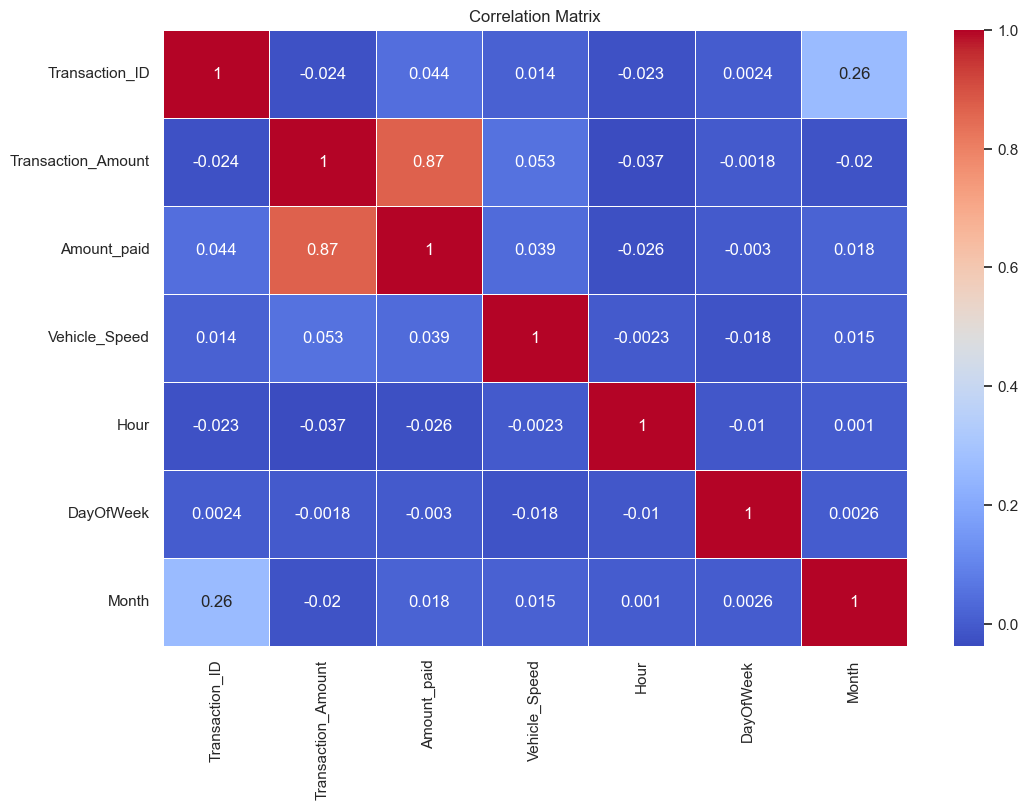

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Feature Engineering

In [27]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Display top 10 rows of DataFrame with missing FastagID for specified columns
print(df[df['FastagID'].isnull()][['Vehicle_Type', 'TollBoothID', 'FastagID']].sample(20))

# Reset display options to default
pd.reset_option('display.max_rows')


     Vehicle_Type TollBoothID FastagID
4791   Motorcycle       D-106      NaN
2607   Motorcycle       D-104      NaN
2642   Motorcycle       D-105      NaN
3636   Motorcycle       D-106      NaN
3447   Motorcycle       D-106      NaN
3482   Motorcycle       D-106      NaN
268    Motorcycle       D-105      NaN
4322   Motorcycle       D-106      NaN
3195   Motorcycle       D-106      NaN
2165   Motorcycle       D-106      NaN
4245   Motorcycle       D-106      NaN
3706   Motorcycle       D-106      NaN
4896   Motorcycle       D-106      NaN
4511   Motorcycle       D-106      NaN
3979   Motorcycle       D-106      NaN
2494   Motorcycle       D-106      NaN
611    Motorcycle       D-106      NaN
2761   Motorcycle       D-105      NaN
93     Motorcycle       D-104      NaN
4637   Motorcycle       D-106      NaN


It seems like for all the motorcycle transactions at TollBooths D-104, D-105, and D-106, the 'FastagID' is missing or NaN. This could be due to various reasons, such as motorcycles not being required to have Fastags in the system, or it might be an anomaly or missing data in the dataset.Missing 'FastagID' is not critical for my analysis.

In [28]:
# Remove 'Transaction_ID', 'FastagID', and 'Geographical_Location' columns
df = df.drop(['Transaction_ID', 'FastagID', 'Geographical_Location'], axis=1)

Transaction_ID' and 'FastagID' columns contain unique identifiers and are not important for my model!

In [29]:
label_encoder=LabelEncoder()
df['Fraud_indicator']=label_encoder.fit_transform(df['Fraud_indicator'])

In [30]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

## Column Transformer

In [31]:
trans = ColumnTransformer(transformers=[
    ('trf1', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), ['Vehicle_Type', 'TollBoothID', 'State_Code']),
    ('trf2', OrdinalEncoder(categories=[['Regular', 'Express']]), ['Lane_Type']),
    ('trf3', OrdinalEncoder(categories=[['Small', 'Medium', 'Large']]), ['Vehicle_Dimensions']),
], remainder='passthrough')

# Fit and transform the training set
X_train_transformed = trans.fit_transform(X_train)

# Transform the test set using the parameters learned from the training set
X_test_transformed = trans.transform(X_test)


## Handling Imbalance Dataset

In [32]:
smote = SMOTE(random_state=27)
smote_X_train, smote_y_train= smote.fit_resample(X_train_transformed,y_train)
smote_X_test, smote_y_test= smote.fit_resample(X_test_transformed,y_test)

## Model

Best parameters for Ada Boost: {'learning_rate': 1.0}
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1607
           1       0.95      0.99      0.97      1607

    accuracy                           0.97      3214
   macro avg       0.97      0.97      0.97      3214
weighted avg       0.97      0.97      0.97      3214



Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1607
           1       0.99      1.00      0.99      1607

    accuracy                           0.99      3214
   macro avg       0.99      0.99      0.99      3214
weighted avg       0.99      0.99      0.99      3214



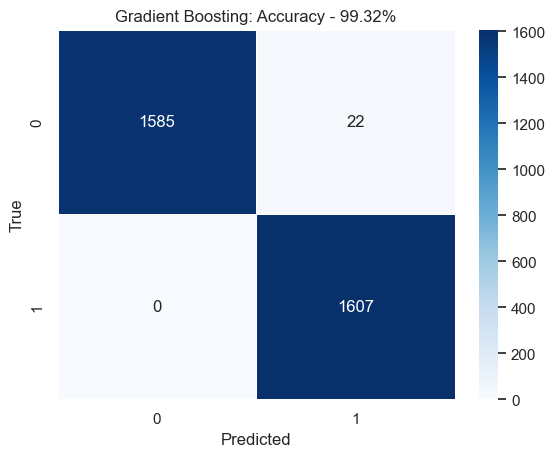

Best parameters for XGBoost: {'learning_rate': 1.0}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1607
           1       0.99      1.00      1.00      1607

    accuracy                           1.00      3214
   macro avg       1.00      1.00      1.00      3214
weighted avg       1.00      1.00      1.00      3214



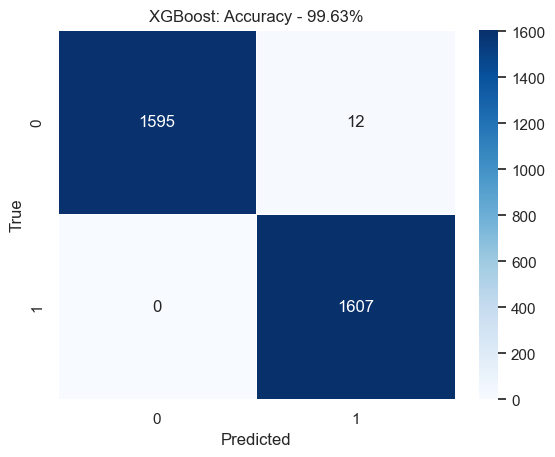

Best parameters for Random Forest: {'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1607
           1       0.96      1.00      0.98      1607

    accuracy                           0.98      3214
   macro avg       0.98      0.98      0.98      3214
weighted avg       0.98      0.98      0.98      3214



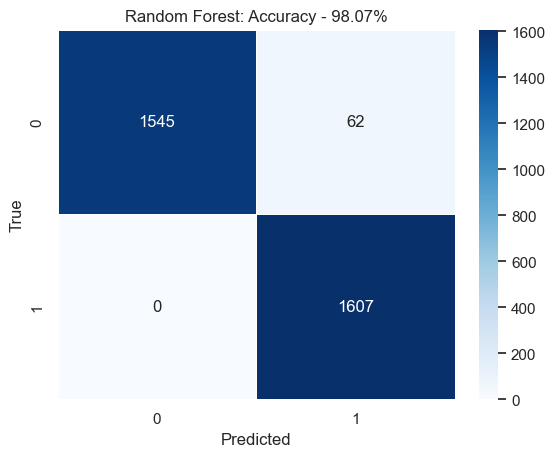

Best parameters for Decision Tree: {'max_depth': 15}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1607
           1       0.99      1.00      0.99      1607

    accuracy                           0.99      3214
   macro avg       0.99      0.99      0.99      3214
weighted avg       0.99      0.99      0.99      3214



In [33]:
def train_and_evaluate_with_grid_search(model, name, X_train, y_train, X_test, y_test, param_grid):
    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model with optimal hyperparameters
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate the best model on the test set
    pred = best_model.predict(X_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    print(report)

    # Display a confusion matrix heatmap
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
    plt.title(f"{name}: Accuracy - {round(score * 100, 2)}%")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Define the parameter grids for each model
param_grid_abc = {'learning_rate': [0.5, 0.9, 1.0]}
param_grid_gbc = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
param_grid_xgb = {'learning_rate': [0.5, 0.9, 1.0]}
param_grid_rfc = {'n_estimators': [50, 100, 200]}
param_grid_dt = {'max_depth': [5, 10, 15]}  # Parameter grid for Decision Tree

# Create models with GridSearchCV
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()  # Add Decision Tree

models = [abc, gbc, xgb, rfc, dt]  # Update the list of models
names = ["Ada Boost", "Gradient Boosting", "XGBoost", "Random Forest", "Decision Tree"]  # Update the list of names
param_grids = [param_grid_abc, param_grid_gbc, param_grid_xgb, param_grid_rfc, param_grid_dt]  # Update the list of parameter grids

# Iterate over models and perform training, evaluation, and visualization
for model, name, param_grid in zip(models, names, param_grids):
    train_and_evaluate_with_grid_search(model, name, smote_X_train, smote_y_train, smote_X_test, smote_y_test, param_grid)
